# About dataset: 
1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)

5. Number of Instances: 398

6. Number of Attributes: 9 including the class attribute

7. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

8. Missing Attribute Values:  horsepower has 6 missing values

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
from sklearn.compose import ColumnTransformer

# ETL process

In [2]:
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration',
           'model year','origin', 'car name']
df = pd.read_csv('auto-mpg.data', sep=';', header=None, na_values='NA')
df.head()

,0
0,18.0 8. 307.0 130.0 3504. 1...
1,15.0 8. 350.0 165.0 3693. 1...
2,18.0 8. 318.0 150.0 3436. 1...
3,16.0 8. 304.0 150.0 3433. 1...
4,17.0 8. 302.0 140.0 3449. 1...


In [3]:
df = df[0].str.split(expand=True)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,18.0,8.,307.0,130.0,3504.,12.0,70.,1.,"""chevrolet",chevelle,"malibu""",None,None,None
1,15.0,8.,350.0,165.0,3693.,11.5,70.,1.,"""buick",skylark,"320""",None,None,None
2,18.0,8.,318.0,150.0,3436.,11.0,70.,1.,"""plymouth","satellite""",None,None,None,None
3,16.0,8.,304.0,150.0,3433.,12.0,70.,1.,"""amc",rebel,"sst""",None,None,None
4,17.0,8.,302.0,140.0,3449.,10.5,70.,1.,"""ford","torino""",None,None,None,None


In [5]:
def join_columns(row):
    cols = [str(valor) for valor in row if not pd.isnull(valor)]
    return ' '.join(cols)
df[8] = df[[8,9,10,11,12,13]].apply(join_columns, axis=1)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,18.0,8.,307.0,130.0,3504.,12.0,70.,1.,"""chevrolet chevelle malibu""",chevelle,"malibu""",None,None,None
1,15.0,8.,350.0,165.0,3693.,11.5,70.,1.,"""buick skylark 320""",skylark,"320""",None,None,None
2,18.0,8.,318.0,150.0,3436.,11.0,70.,1.,"""plymouth satellite""","satellite""",None,None,None,None
3,16.0,8.,304.0,150.0,3433.,12.0,70.,1.,"""amc rebel sst""",rebel,"sst""",None,None,None
4,17.0,8.,302.0,140.0,3449.,10.5,70.,1.,"""ford torino""","torino""",None,None,None,None


In [7]:
df.drop([9,10,11,12,13], axis=1, inplace=True)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8.,307.0,130.0,3504.,12.0,70.,1.,"""chevrolet chevelle malibu"""
1,15.0,8.,350.0,165.0,3693.,11.5,70.,1.,"""buick skylark 320"""
2,18.0,8.,318.0,150.0,3436.,11.0,70.,1.,"""plymouth satellite"""
3,16.0,8.,304.0,150.0,3433.,12.0,70.,1.,"""amc rebel sst"""
4,17.0,8.,302.0,140.0,3449.,10.5,70.,1.,"""ford torino"""


## The name of the variables must be changed

In [9]:
df.columns = columns

In [10]:
df.shape

(406, 9)

In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.,307.0,130.0,3504.,12.0,70.,1.,"""chevrolet chevelle malibu"""
1,15.0,8.,350.0,165.0,3693.,11.5,70.,1.,"""buick skylark 320"""
2,18.0,8.,318.0,150.0,3436.,11.0,70.,1.,"""plymouth satellite"""
3,16.0,8.,304.0,150.0,3433.,12.0,70.,1.,"""amc rebel sst"""
4,17.0,8.,302.0,140.0,3449.,10.5,70.,1.,"""ford torino"""


## General vision of the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           406 non-null    object
 1   cylinders     406 non-null    object
 2   displacement  406 non-null    object
 3   horsepower    406 non-null    object
 4   weight        406 non-null    object
 5   acceleration  406 non-null    object
 6   model year    406 non-null    object
 7   origin        406 non-null    object
 8   car name      406 non-null    object
dtypes: object(9)
memory usage: 28.7+ KB


The car name is an attribute that is not necessary for modeling the data, so we can dispense with this feature and remove it.

In [13]:
df.drop(['car name'], axis=1, inplace=True)
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.,307.0,130.0,3504.,12.0,70.,1.
1,15.0,8.,350.0,165.0,3693.,11.5,70.,1.


## Missing values

In [14]:
df['mpg'][10:15]

10    NA
11    NA
12    NA
13    NA
14    NA
Name: mpg, dtype: object

In [15]:
mapping = {'NA': np.nan}
df = df.replace(mapping)

In [16]:
df.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

### Change th data type of variables

In [17]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.,307.0,130.0,3504.,12.0,70.,1.
1,15.0,8.,350.0,165.0,3693.,11.5,70.,1.


In [18]:
data_int = ['cylinders', 'weight', 'model year', 'origin']
data_float = ['mpg', 'acceleration', 'displacement', 'horsepower']

for col in data_int:
    df[col] = df[col].apply(lambda x: str(x).replace('.', ''))
    df[col] = df[col].astype('int')
for col in data_float:
    df[col] = df[col].astype('float')

In [19]:
df.dtypes

mpg             float64
cylinders         int32
displacement    float64
horsepower      float64
weight            int32
acceleration    float64
model year        int32
origin            int32
dtype: object

### Impute missing data

In [20]:
df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
38,25.0,4,98.0,NaN,2046,19.0,71,1
133,21.0,6,200.0,NaN,2875,17.0,74,1
337,40.9,4,85.0,NaN,1835,17.3,80,2
343,23.6,4,140.0,NaN,2905,14.3,80,1
361,34.5,4,100.0,NaN,2320,15.8,81,2
382,23.0,4,151.0,NaN,3035,20.5,82,1


In [21]:
df[df['mpg'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
10,NaN,4,133.0,115.0,3090,17.5,70,2
11,NaN,8,350.0,165.0,4142,11.5,70,1
12,NaN,8,351.0,153.0,4034,11.0,70,1
13,NaN,8,383.0,175.0,4166,10.5,70,1
14,NaN,8,360.0,175.0,3850,11.0,70,1
17,NaN,8,302.0,140.0,3353,8.0,70,1
39,NaN,4,97.0,48.0,1978,20.0,71,2
367,NaN,4,121.0,110.0,2800,15.4,81,2


#### Impute the null values of horsepower by the general average 

In [22]:
mean_horsepower = df['horsepower'].mean()
df['horsepower'].fillna(mean_horsepower, inplace=True)

#### Delete the records where the variable mpg has NaN values, this is due to the small amount of data we have as null and also that mpg is the tarjet variable.

In [23]:
df = df.dropna(subset='mpg')

In [24]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [25]:
df.shape

(398, 8)

#### Deleting duplicates values

In [26]:
df = df.drop_duplicates()

In [27]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1
402,44.0,4,97.0,52.0,2130,24.6,82,2
403,32.0,4,135.0,84.0,2295,11.6,82,1
404,28.0,4,120.0,79.0,2625,18.6,82,1


#### Outliers

In [28]:
columns.pop()

'car name'

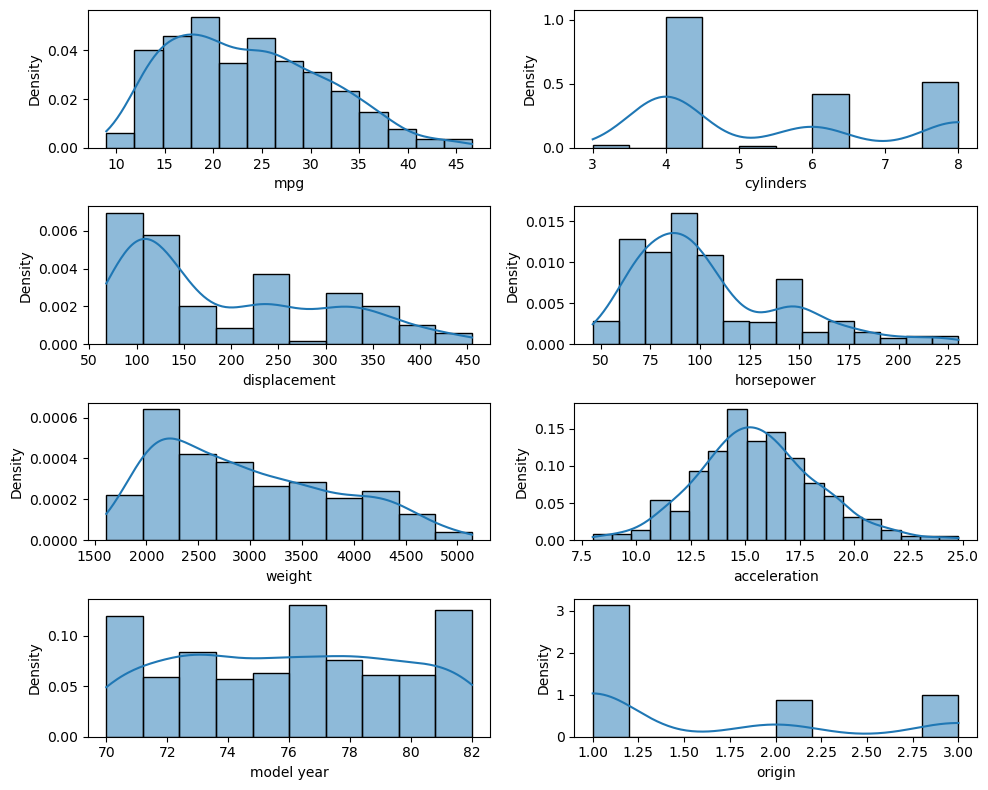

In [29]:
fig, axes = plt.subplots(4,2, figsize=(10,8))
axes = axes.ravel()  # flattening the array makes indexing easier
for col, ax in zip(columns, axes):
    sns.histplot(df[col], kde=True, stat='density', ax=ax)
plt.tight_layout()


there is no outliers in this dataset

### One Hot Encoding applied to origin column

In [30]:
df = pd.get_dummies(df, columns=['origin'], drop_first=False)

In [31]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
402,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
403,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
404,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


<Axes: ylabel='mpg'>

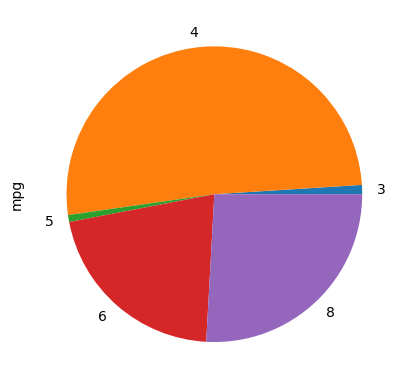

In [32]:
df.groupby('cylinders')['mpg'].count().plot(kind='pie')

# Divide the dataframe in features (X) and target (y)

In [33]:
X = df.drop(['mpg'], axis=1)
y = df[['mpg']]

In [34]:
X.sample(5)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
206,6,225.0,100.0,3651,17.7,76,1,0,0
323,6,225.0,90.0,3381,18.7,80,1,0,0
183,6,232.0,90.0,3211,17.0,75,1,0,0
63,4,91.0,70.0,1955,20.5,71,1,0,0
52,6,258.0,110.0,2962,13.5,71,1,0,0


In [35]:
y.sample(5)

,mpg
264,19.4
250,21.5
206,20.0
235,18.5
300,31.9


## The preprocessing and modeling:

In [36]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
scaler = StandardScaler()

# Models
models = [
    LinearRegression(),
    Ridge(alpha=10),
    Lasso(alpha=0.1)
]
# CV Scores using train data
for model in models:
    CV = KFold(n_splits=4, shuffle=True, random_state=1)
    
    # Pipeline
    model_pipe = Pipeline([
        ('scaler', scaler),
        ('model', model)
    ])    
    model_rmse = cross_val_score(
        model_pipe,
        X_train,
        y_train,
        cv=CV,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
    )
    
    print(f"CV RMSE of {model} = {np.mean(model_rmse)}")

print("\n")

# RMSE Score of test data
for model in models:
    model = model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(f"Test RMSE of {model} = {np.sqrt(mean_squared_error(prediction,y_test))}")
print("\n")

# Accuracy Score of test data
for model in models:
    model = model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(f"MAE of {model} = {mean_absolute_error(y_test, prediction)}")
print("\n")

# Accuracy Score of test data
for model in models:
    model = model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(f"r2 score of {model} = {r2_score(y_test, prediction)}")
print("\n")

# Accuracy Score of test data
for model in models:
    model = model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(f"r2 score of {model} = {r2_score(y_test, prediction)}")



CV RMSE of LinearRegression() = -3.302946885514813
CV RMSE of Ridge(alpha=10) = -3.321955608471404
CV RMSE of Lasso(alpha=0.1) = -3.2622930637892624


Test RMSE of LinearRegression() = 3.7433212895186063
Test RMSE of Ridge(alpha=10) = 3.7575299231172195
Test RMSE of Lasso(alpha=0.1) = 3.7724415632742154


MAE of LinearRegression() = 2.6967491528670813
MAE of Ridge(alpha=10) = 2.7040943966044595
MAE of Lasso(alpha=0.1) = 2.7224304080045507


r2 score of LinearRegression() = 0.7849711940784098
r2 score of Ridge(alpha=10) = 0.7833357138404762
r2 score of Lasso(alpha=0.1) = 0.781612650743069


r2 score of LinearRegression() = 0.7849711940784098
r2 score of Ridge(alpha=10) = 0.7833357138404762
r2 score of Lasso(alpha=0.1) = 0.781612650743069


**The models used here:**

+ Linear Regression
+ Ridge Regression with alpha = 10
+ Lasso Regression with alpha = 0.1

These three models will be compared when using train_data and test_data using the root mean squared error evaluator. And the result:

From the result above it can be see that the RMSE score (CV RMSE) using the train_data shows that Lasso Regression gets the best score (the lowest, ignoring the negative sign), but when used using the test_data the Linear Regression gets the better score (Test RMSE) compared to the Lasso and Ridge regressions.

There is an overfit to the linear regression model when trained using train_data, and in this case, either Ridge or Lasso Regression can be used to improve the final model score in the test_data.

<h2> <em> Finally the best model is Linear Regression </em> </h2>

In [37]:
best_model = models[0]

In [40]:
X.sample()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
15,8,383.0,170.0,3563,10.0,70,1,0,0


### Saving the trained model

In [55]:
import pickle

In [59]:
filename = 'models/trained_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

### Loading the saved model

In [60]:
filename = 'models/trained_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [74]:
def origin_verify(input_data):
    if input_data['origin'] == 1:
        input_data['origin_1'] = input_data.pop('origin')
        input_data['origin_2'] = 0
        input_data['origin_3'] = 0
    elif input_data['origin'] == 2:
        input_data['origin_1'] = 0
        input_data['origin_2'] = input_data.pop('origin')
        input_data['origin_2'] = 1
        input_data['origin_3'] = 0
    else:
        input_data['origin_1'] = 0
        input_data['origin_2'] = 0
        input_data['origin_3'] = input_data.pop('origin')
        input_data['origin_3'] = 1
    return input_data

In [77]:
input_data = {
    'cylinders': 6,
    'displacement': 350,
    'horsepower': 100,
    'weight': 4400,
    'acceleration': 15,
    'model year': 72,
    'origin' : 2
}
input_data = origin_verify(input_data)

In [83]:
# We convert the input to a single-row DataFrame to have feature names
input_df = pd.DataFrame([input_data])

# We can now pass this input to the model to make predictions.
prediction = loaded_model.predict(input_df)

# The output of the prediction is the predicted value
print("mpg:", round(prediction[0][0], 1))

Valor predicho: 15.7
